In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv("data/city_data.csv").dropna()
ride_data=pd.read_csv("data/ride_data.csv").dropna()

# Combine the data into a single dataset
combined_data = pd.merge(ride_data, city_data,how='left',on='city')
combined_data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

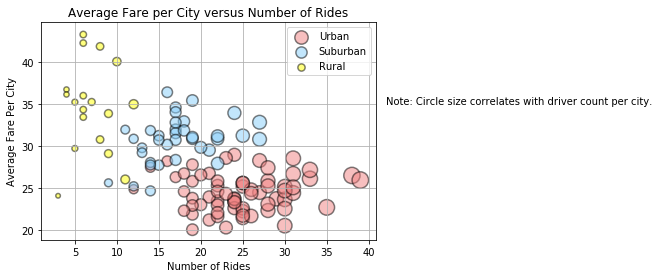

In [3]:
# Obtain the x and y coordinates for each of the three city types
#Calculate the average fare per city
average_fare=combined_data.groupby("city")['fare'].mean()
average_fare

#calculate the total number of  rides by city
total_rides=combined_data.groupby("city")['ride_id'].count()
total_rides

#Calculate number of drivers by city
total_drivers= combined_data.groupby("city")['driver_count'].count()
total_drivers

#To classify city by city type
city_type = city_data.set_index('city')['type']
city_type.value_counts()
pyber_data = pd.DataFrame({"Average Fare per City":average_fare,
               "Number of Rides": total_rides,
               "Number of Drivers": total_drivers,
               "City Type": city_type})
pyber_data.head()
#To derive the city types from the data
#urban
urban = pyber_data.loc[pyber_data["City Type"]== "Urban"]

#suburban
suburban = pyber_data.loc[pyber_data["City Type"]== "Suburban"]

#rural
rural = pyber_data.loc[pyber_data["City Type"]== "Rural"]

# Build the scatter plots for each city types
# urban
plt.scatter(urban["Number of Rides"], urban["Average Fare per City"], color = "lightcoral", edgecolors="black", s = urban["Number of Drivers"]*7, label = "Urban", alpha = 0.5, linewidth = 1.5)

#suburban
plt.scatter(suburban["Number of Rides"], suburban["Average Fare per City"], color = "lightskyblue", edgecolors="black", s = suburban["Number of Drivers"]*7, label = "Suburban", alpha = 0.5, linewidth = 1.5)

#rural
plt.scatter(rural["Number of Rides"], rural["Average Fare per City"], color = "yellow", edgecolors="black", s =rural["Number of Drivers"]*7, label = "Rural", alpha = 0.5, linewidth = 1.5)

#Incorporate the other graph properties
plt.title("Average Fare per City versus Number of Rides")
plt.xlabel("Number of Rides")
plt.ylabel("Average Fare Per City")

# # Create a legend
plt.legend(loc= "best")

#Incorporate a text label regarding circle size
plt.text(42,35,"Note: Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("../Images/Bubble_plot.png", bbox_inches='tight')

# Show plot in a grid
plt.grid()




## Total Fares by City Type

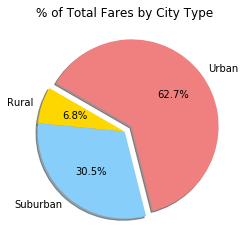

In [3]:
# Calculate Type Percents
city_fare_pie=combined_data.groupby(["type"])['fare'].sum()
city_fare_pie

#Use the City Pie index for wedge labels.
city_fare_pie.index

# Build Pie Chart
#Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]

#Only explode the third section of the pie chart.
explode = (0,0, 0.1)

#Set the pie chart properties.
plt.pie(city_fare_pie, labels = city_fare_pie.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 150)

#Tell Matplotlib that we want a pie chart with equal axes.
# plt.axis("equal")

#Add the legend.
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("../Images/city_fare_pie.png")

#Show the chart. 
plt.show()



## Total Rides by City Type

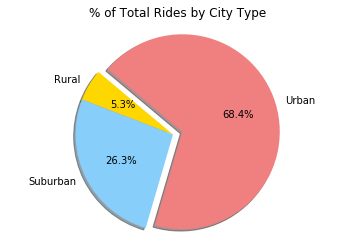

In [4]:
# Calculate Ride Percents
city_ride_pie=combined_data.groupby(["type"])['ride_id'].count()
city_ride_pie

# # Build Pie Chart
# #Use the City Pie index for wedge labels.
city_ride_pie.index

# #Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]

# #Only explode the third section of the pie chart.
explode = (0,0, 0.1)

# #Set the pie chart properties.
plt.pie(city_ride_pie, labels = city_ride_pie.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 140)

# #Tell Matplotlib that we want a pie chart with equal axes.
plt.axis("equal")

# #Add the legend.
plt.title("% of Total Rides by City Type")

# # Save Figure
plt.savefig("../Images/city_ride_pie.png")

# #Show the chart.
plt.show()





In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

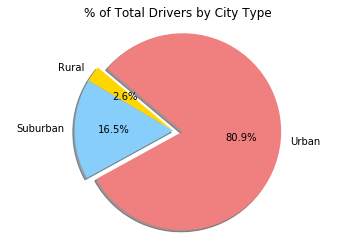

In [6]:
# Calculate Driver Percents
city_drivers_pie=city_data.groupby(["type"])['driver_count'].sum()
city_drivers_pie
# Build Pie Charts
#Use the City Pie index for wedge labels.
city_drivers_pie.index

#Set the colors of each section of the pie chart.
colors = ["gold", "lightskyblue", "lightcoral"]

# #Only explode the third section of the pie chart.
explode = (0,0, 0.1)

# #Set the pie chart properties.
plt.pie(city_drivers_pie, labels = city_drivers_pie.index, autopct = "%1.1f%%", colors = colors, explode = explode, shadow = True, startangle = 140)

# #Tell Matplotlib that we want a pie chart with equal axes.
plt.axis("equal")

# #Add the legend.
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("../Images/city_drivers_pie.png")

# #Show the chart.
plt.show()




In [8]:
#Observable trends
# 1.The total rides in the city areas form a greater proportion(68.4%) than those in the suburban(26.3%) and rural areas(5.3%).However,the 
# rides in the city areas though many are short.
# 2.The average fare was highest in the rural areas than was in the suburban and urban areas.Therefore, the drivers in the rural areas took a 
# fewer number of rides than in any other city type but charged a higher average fare for the trips made.
# 3.The urban cities had the highest driver count (80.9%)than the suburban(16.5%) and the rural(2.6%)cities.